<a href="https://colab.research.google.com/github/ankitg-02/extern/blob/main/Webacy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data=pd.read_excel("/content/compiled_risk_data (1).xlsx")
Webacy=pd.DataFrame(data)
Webacy.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,0.0,0.0,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,0.0,1.0,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,0.0,1.0,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,0.0,1.0,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,0.0,0.0,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [3]:
Webacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   project_name                                967 non-null    object 
 1   Smart contract address                      967 non-null    object 
 2   Blog post link                              967 non-null    object 
 3   Audit website                               967 non-null    object 
 4   Chain                                       967 non-null    object 
 5   Is_closed_source                            967 non-null    bool   
 6   hidden_owner                                967 non-null    bool   
 7   anti_whale_modifiable                       967 non-null    bool   
 8   Is_anti_whale                               967 non-null    bool   
 9   Is_honeypot                                 967 non-null    bool   
 10  buy_tax       

In [18]:
for i in Webacy.columns[5:36]:
  print(Webacy[i].value_counts())

Is_closed_source
False    821
True     146
Name: count, dtype: int64
hidden_owner
False    817
True     150
Name: count, dtype: int64
anti_whale_modifiable
False    855
True     112
Name: count, dtype: int64
Is_anti_whale
False    829
True     138
Name: count, dtype: int64
Is_honeypot
False    878
True      89
Name: count, dtype: int64
buy_tax
False    850
True     117
Name: count, dtype: int64
sell_tax
False    848
True     119
Name: count, dtype: int64
slippage_modifiable
False    828
True     139
Name: count, dtype: int64
Is_blacklisted
False    891
True      76
Name: count, dtype: int64
can_take_back_ownership
False    786
True     181
Name: count, dtype: int64
owner_change_balance
False    763
True     204
Name: count, dtype: int64
is_airdrop_scam
False    902
True      65
Name: count, dtype: int64
selfdestruct
False    856
True     111
Name: count, dtype: int64
trust_list
False    827
True     140
Name: count, dtype: int64
is_whitelisted
False    861
True     106
Name: count, dty

In [10]:
risk_columns=[]
for i in Webacy.columns[5:36]:
  risk_columns.append(i)
print(risk_columns)

['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax', 'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation', 'bad_contract', 'reusing_state_variable', 'encode_packed_collision', 'encode_packed_parameters', 'centralized_risk_medium', 'centralized_risk_high', 'centralized_risk_low', 'event_setter', 'external_dependencies', 'immutable_states', 'reentrancy_without_eth_transfer', 'incorrect_inheritance_order', 'shadowing_local']


In [27]:
frequencies=[]
for i in Webacy.columns[5:36]:
  try:
    frequencies.append(Webacy[i].value_counts().loc[True])
  except KeyError:
    frequencies.append(0)
print(frequencies)

[146, 150, 112, 138, 89, 117, 119, 139, 76, 181, 204, 65, 111, 140, 106, 87, 63, 437, 0, 0, 0, 0, 0, 0, 0, 140, 291, 145, 190, 96, 79]


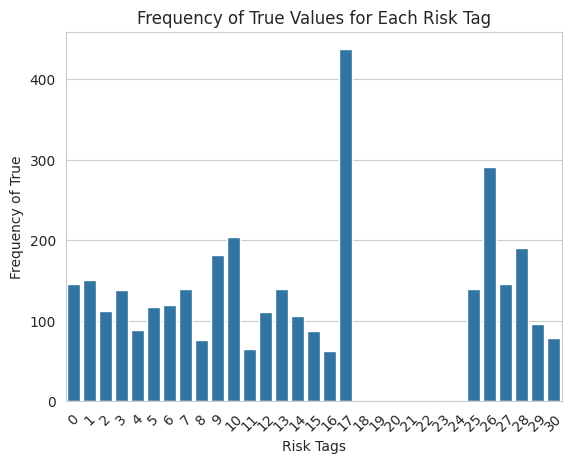

In [30]:
sns.set_style("whitegrid")
frequencies = pd.Series(frequencies)
sns.barplot(x=frequencies.index, y=frequencies.values)
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=45)
plt.show()